In [35]:
#import pack
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
# import des data
from tensorflow.keras.datasets import cifar10

(X_train , y_train), (X_test , y_test) = cifar10.load_data()

255

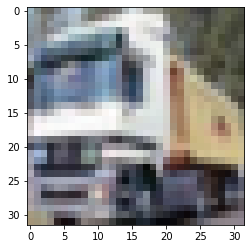

In [37]:
#analyse 
X_train.shape  #(50000, 32, 32, 3)  
# cela contient nb d image , 32*32 pixels , 3 caneaux de couleur

plt.imshow (X_train[1])
#les images sont tres petites et mal pixelisé

X_train[0].max()  #255

In [38]:
# analyse target
# y_train.shape (50000, 1)

y_train.max()
y_train.min()

# cest de la classification 

0

In [39]:
#nomalisation 
X_train_n = X_train /255
X_test_n = X_test /255

In [40]:
#transformation en category 
from tensorflow.keras.utils import to_categorical

y_train_c = to_categorical (y_train)
y_test_c = to_categorical (y_test)

# https://www.cs.toronto.edu/~kriz/cifar.html

In [41]:
X_train.shape
# y_train_c.shape

(50000, 32, 32, 3)

In [42]:
#CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D, Flatten

model = Sequential ()

model.add(Conv2D ( filters = 32, 
                  kernel_size = (4,4), 
                  activation='relu', 
                  input_shape= (32, 32, 3) ) )
          
model.add(MaxPool2D ( pool_size=(2, 2) )  )
          
model.add(Flatten ())
          
model.add ( Dense (128 , activation = 'relu'))

model.add ( Dense (10 ,                      # il y a 10 classes
                   activation = 'softmax'))  # c est un pb de 
                                             # classification multi class


In [43]:
# compile
model.compile ( optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'],)


In [44]:
#earlystopping
from tensorflow.keras.callbacks import EarlyStopping

ea = EarlyStopping ( monitor='val_loss',
                patience=1)

In [45]:
# fit 
model.fit ( x=X_train_n,
            y=y_train_c,
            epochs=10,
            callbacks=[ea],
            validation_data=(X_test_n, y_test_c)   )

Epoch 1/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.2214 - accuracy: 0.4844 - val_loss: 0.1956 - val_accuracy: 0.5552
Epoch 2/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.1816 - accuracy: 0.5976 - val_loss: 0.1783 - val_accuracy: 0.6058
Epoch 3/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.1624 - accuracy: 0.6462 - val_loss: 0.1727 - val_accuracy: 0.6197
Epoch 4/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.1469 - accuracy: 0.6856 - val_loss: 0.1640 - val_accuracy: 0.6472
Epoch 5/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.1363 - accuracy: 0.7092 - val_loss: 0.1671 - val_accuracy: 0.6428


<AxesSubplot:>

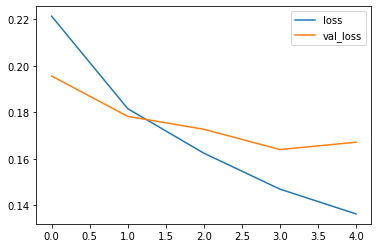

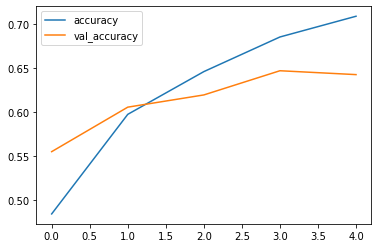

In [49]:
df = pd.DataFrame(model.history.history)

df[['loss' , 'val_loss' ]].plot ()

df[['accuracy' , 'val_accuracy' ]].plot ()


In [51]:
X_train_n.shape


(50000, 32, 32, 3)

In [ ]:
y_train_c

In [63]:
y_test_c[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [74]:
# prediction set de test
pred = to_categorical ( np.argmax ( model.predict (  X_test_n  ) , axis = 1 ) )

pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

array([[763,  32,  58,   5,  19,   5,  23,   3,  47,  45],
       [ 26, 826,  12,   6,   3,   3,  11,   3,  16,  94],
       [ 86,  13, 524,  34,  94,  96,  85,  40,  14,  14],
       [ 26,  30, 120, 315,  73, 243, 106,  31,  26,  30],
       [ 43,  10, 118,  50, 539,  52,  91,  77,  15,   5],
       [ 25,  14,  94,  96,  48, 609,  44,  36,  21,  13],
       [  9,  15,  48,  41,  29,  39, 792,   8,   9,  10],
       [ 23,  10,  51,  25,  80,  95,  14, 674,   3,  25],
       [140,  89,  13,   4,   7,  10,  11,   4, 667,  55],
       [ 43, 148,  13,   4,   7,  13,  15,  14,  24, 719]], dtype=int64)

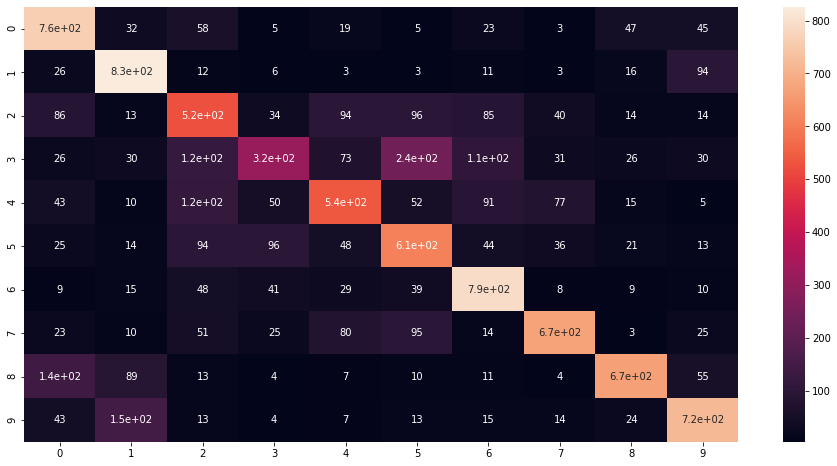

In [80]:
# confusion_matrix
from sklearn.metrics import classification_report , confusion_matrix

conf = confusion_matrix(y_test_c.argmax(axis=1), pred.argmax(axis=1)  , )


plt.figure (figsize = (16,8))
sns.heatmap (conf , annot = True) ;
conf

In [82]:
# classification_report
print (classification_report (y_test_c, pred))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1000
           1       0.70      0.83      0.76      1000
           2       0.50      0.52      0.51      1000
           3       0.54      0.32      0.40      1000
           4       0.60      0.54      0.57      1000
           5       0.52      0.61      0.56      1000
           6       0.66      0.79      0.72      1000
           7       0.76      0.67      0.71      1000
           8       0.79      0.67      0.72      1000
           9       0.71      0.72      0.72      1000

   micro avg       0.64      0.64      0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000
 samples avg       0.64      0.64      0.64     10000



In [88]:
# prdiction unique 

une_pred = model.predict (X_test[0].reshape (1, 32, 32, 3) ) 
une_pred.argmax()

# donc on predit un chat 
# https://www.cs.toronto.edu/~kriz/cifar.html

3

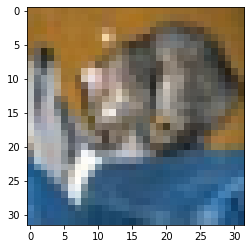

In [89]:
plt.imshow ( X_test[0])

In [85]:
X_test.shape

(10000, 32, 32, 3)

In [86]:
X_test[0].shape

(32, 32, 3)

In [ ]:
#conclusion :
# c est pas mal pour une 1ere approche 
# mais le CNN peut etre ameliorer pour avoir une meilleure accuracy 

In [90]:
# new CNN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D, Flatten

model = Sequential ()

model.add(Conv2D ( filters = 32, 
                  kernel_size = (4,4), 
                  activation='relu', 
                  input_shape= (32, 32, 3) ) )
          
model.add(MaxPool2D ( pool_size=(2, 2) )  )

#par rapport au modele precedent nous avons ajouté une couche de conv et de 
#pooling
model.add(Conv2D ( filters = 32, 
                  kernel_size = (4,4), 
                  activation='relu', 
                  input_shape= (32, 32, 3) ) )
          
model.add(MaxPool2D ( pool_size=(2, 2) )  )
          
model.add(Flatten ())
          
model.add ( Dense (128 , activation = 'relu'))

model.add ( Dense (10 ,                      # il y a 10 classes
                   activation = 'softmax'))  # c est un pb de 
                                             # classification multi class


In [91]:
# compile new model
model.compile (     optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'], )

In [92]:
#callbacks 

from tensorflow.keras.callbacks import EarlyStopping

ea = EarlyStopping (    monitor='val_loss',
    patience=1,)

In [93]:
#fit

model.fit ( x=X_train_n,
            y=y_train_c,
            epochs=10,
            callbacks=[ea],
            validation_data=(X_test_n, y_test_c)   )

Epoch 1/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.2294 - accuracy: 0.4588 - val_loss: 0.2066 - val_accuracy: 0.5240
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1850 - accuracy: 0.5873 - val_loss: 0.1802 - val_accuracy: 0.5979
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1652 - accuracy: 0.6378 - val_loss: 0.1646 - val_accuracy: 0.6420
Epoch 4/10
1563/1563 [==============================] - 51s 32ms/step - loss: 0.1504 - accuracy: 0.6762 - val_loss: 0.1569 - val_accuracy: 0.6566
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1398 - accuracy: 0.6989 - val_loss: 0.1514 - val_accuracy: 0.6745
Epoch 6/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1300 - accuracy: 0.7238 - val_loss: 0.1498 - val_accuracy: 0.6835
Epoch 7/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.1221 - accuracy: 0.7416 - val_loss: 0.1613 -

In [95]:
#prediction 

p = to_categorical(np.argmax(model.predict (X_test_n) , axis = 1))

In [97]:
# evaluation 

from sklearn.metrics import classification_report 
print (classification_report (p ,y_test_c ))

#analyse 
# L accuracy de la classe 3 (cat) n est pas tres elevé
# L accuracy de la classe 5 (chien) n est pas tres elevé

# le modele a du mal a reconnaitre les chats et les chients
#  ce qui baisse la presicion general du modele

              precision    recall  f1-score   support

           0       0.73      0.63      0.67      1163
           1       0.83      0.79      0.81      1044
           2       0.62      0.46      0.53      1332
           3       0.25      0.60      0.36       426
           4       0.65      0.56      0.60      1169
           5       0.49      0.63      0.55       773
           6       0.77      0.68      0.73      1132
           7       0.73      0.73      0.73       999
           8       0.76      0.76      0.76      1007
           9       0.72      0.76      0.74       955

   micro avg       0.66      0.66      0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.68      0.66      0.66     10000
 samples avg       0.66      0.66      0.66     10000



In [ ]:
# conlusion : 
# les resultats sont deja superieur
#essayons plus fort 

In [103]:
# new CNN 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D, MaxPool2D, Flatten

model = Sequential ()

model.add(Conv2D ( filters = 32, 
                  kernel_size = (4,4), 
                  activation='relu', 
                  input_shape= (32, 32, 3) ) )
          
model.add(MaxPool2D ( pool_size=(2, 2) )  )

model.add(Conv2D ( filters = 32, 
                  kernel_size = (4,4), 
                  activation='relu', 
                  input_shape= (32, 32, 3) ) )
          
model.add(MaxPool2D ( pool_size=(2, 2) )  )


#par rapport au modele precedent nous avons ajouté 1 couche de conv et de 
#pooling
model.add(Conv2D ( filters = 32, 
                  kernel_size = (4,4), 
                  activation='relu', 
                  input_shape= (32, 32, 3) ) )
          
model.add(MaxPool2D ( pool_size=(2, 2) )  )

#

model.add(Flatten ())
          
model.add ( Dense (128 , activation = 'relu'))

model.add ( Dense (10 ,                      # il y a 10 classes
                   activation = 'softmax'))  # c est un pb de 
                                             # classification multi class


In [105]:
# summary model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 32)          16416     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)               

In [106]:
# compile new model
model.compile (     optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'], )

In [107]:
model.fit ( x=X_train_n,
            y=y_train_c,
            epochs=10,
            callbacks=[ea],
            validation_data=(X_test_n, y_test_c)   )

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.2496 - accuracy: 0.3885 - val_loss: 0.2174 - val_accuracy: 0.4937
Epoch 2/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2049 - accuracy: 0.5285 - val_loss: 0.1960 - val_accuracy: 0.5478
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1854 - accuracy: 0.5861 - val_loss: 0.1881 - val_accuracy: 0.5789
Epoch 4/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.1725 - accuracy: 0.6177 - val_loss: 0.1772 - val_accuracy: 0.6087
Epoch 5/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.1640 - accuracy: 0.6400 - val_loss: 0.1708 - val_accuracy: 0.6281
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.1569 - accuracy: 0.6581 - val_loss: 0.1614 - val_accuracy: 0.6469
Epoch 7/10
1563/1563 [==============================] - 49s 32ms/step - loss: 0.1507 - accuracy: 0.6727 - val_loss: 0.1629 -

In [108]:
#prediction 

p = to_categorical(np.argmax(model.predict (X_test_n) , axis = 1))

In [109]:
# evaluation 

from sklearn.metrics import classification_report 
print (classification_report (p ,y_test_c ))

#la precision est plus basse 
# les images sont petites 

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1067
           1       0.83      0.76      0.79      1095
           2       0.60      0.49      0.54      1239
           3       0.44      0.50      0.47       888
           4       0.55      0.58      0.56       948
           5       0.40      0.68      0.50       585
           6       0.80      0.64      0.71      1254
           7       0.69      0.71      0.70       979
           8       0.79      0.75      0.77      1054
           9       0.68      0.76      0.72       891

   micro avg       0.65      0.65      0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.67      0.65      0.65     10000
 samples avg       0.65      0.65      0.65     10000

